In [1]:
from dolfin import *
from mshr import *

In [2]:
# Create mesh
domain = Circle(Point(0, 0), 1)
mesh = generate_mesh(domain, 64)

In [24]:
# Initialize solve parameters
beta = 8
R0 = 0.6
p = Expression('4*exp(-pow(beta, 2)*(pow(x[0], 2) + pow(x[1] - R0, 2)))', degree=1, beta=beta, R0=R0)

In [4]:
# Define function space
V = FunctionSpace(mesh, "Lagrange", 1)

In [5]:
# Define Dirichlet boundary
def boundary(x, on_boundary):
    return on_boundary

In [6]:
# Define boundary condition
w_D = Constant(0)
bc = DirichletBC(V, w_D, boundary)

In [7]:
# Define variational problem
w = TrialFunction(V)
v = TestFunction(V)
a = dot(grad(w), grad(v))*dx
L = p*v*dx

In [8]:
# Compute solution
w = Function(V)
solve(a == L, w, bc)

<class 'dolfin.function.function.Function'>
<class 'dolfin.function.function.Function'>


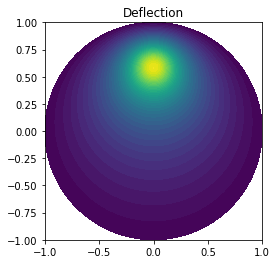

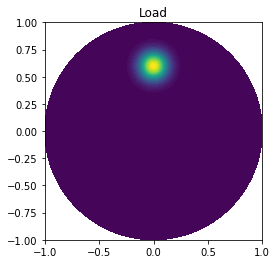

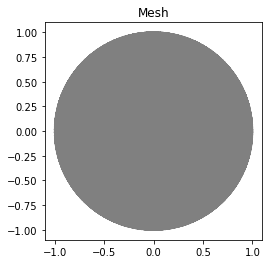

In [26]:
# Plot solution
import matplotlib.pyplot as plt
p = interpolate(p, V)
plt.figure(1)
plot(w, title='Deflection')
plt.figure(2)
plot(p, title='Load')
plt.figure(3)
plot(mesh, title="Mesh")
plt.show()

In [10]:
import numpy as np
step = 0.001
y = np.linspace(-1 + step, 1 - step, 101)
points = [(0, y_) for y_ in y]
w_line = np.array([w(point) for point in points])
p_line = np.array([p(point) for point in points])

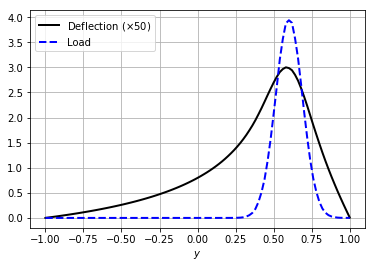

In [11]:
plt.plot(y, 50*w_line, 'k', linewidth=2)
plt.plot(y, p_line, 'b--', linewidth=2)
plt.grid(True)
plt.xlabel('$y$')
plt.legend(['Deflection ($\\times 50$)', 'Load'], loc='upper left')